<a href="https://colab.research.google.com/github/caropeboka/mall-pyspark/blob/main/MSIB_Big_Data_Analytics_dengan_PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hai semuanya, pada kesempatan ini kalian akan mengerjakan tugas akhir berupa praktikum analisis data menggunakan PySpark.

Semangat Belajar dan Jangan menyerah :)

Silahkan download data berikut
https://drive.google.com/drive/folders/1NhEG9zRplX6QXnwhk9-QJxV1hmzpknGD?usp=sharing

dan masukan ke dalam google drive anda 

Muhammad Kevin Mahendra Caropeboka

MSIB Bisa AI

AI-Hacker

**1. Silahkan install PySpark**

In [ ]:
!pip install pyspark py4j

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 28 kB/s 
     |████████████████████████████████| 200 kB 44.4 MB/s 
     |████████████████████████████████| 199 kB 52.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=8b3b415d2f3068744346041c250cd859f6e77b91d51fcbf9b2be32956070667f
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


**2. Silahkan Mengcreate Spark Session**

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("big_data").getOrCreate()
spark

**3. Masukan data yang telah di download pada google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = spark.read.csv('/content/drive/MyDrive/Dataset/mall.csv', header=True, inferSchema=True)
df.show()

Mounted at /content/drive
+----------+------+---+------------------+----------------------+
|CustomerID|Gender|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
|         1|  Male| 19|                15|                    39|
|         2|  Male| 21|                15|                    81|
|         3|Female| 20|                16|                     6|
|         4|Female| 23|                16|                    77|
|         5|Female| 31|                17|                    40|
|         6|Female| 22|                17|                    76|
|         7|Female| 35|                18|                     6|
|         8|Female| 23|                18|                    94|
|         9|  Male| 64|                19|                     3|
|        10|Female| 30|                19|                    72|
|        11|  Male| 67|                19|                    14|
|        12|Female| 35|                19|        

**4. Buat Perintah yang dapat menampilkan tipe data pada setiap kolom**

In [ ]:
df.printSchema()

root
 |-- CustomerID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Annual Income (k$): integer (nullable = true)
 |-- Spending Score (1-100): integer (nullable = true)



**5. Buat perintah yang dapat menampilkan nama kolom, jumlah baris, dan jumlah kolom**

In [ ]:
#kolom
df.columns

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [ ]:
#baris
df.count()

200

In [ ]:
#jumlah kolom
len(df.columns)

5

**6. Buat perintah yang dapat menampilkan statistik data pada setiap kolom**

In [ ]:
df.describe().show()

+-------+------------------+------+-----------------+------------------+----------------------+
|summary|        CustomerID|Gender|              Age|Annual Income (k$)|Spending Score (1-100)|
+-------+------------------+------+-----------------+------------------+----------------------+
|  count|               200|   200|              200|               200|                   200|
|   mean|             100.5|  null|            38.85|             60.56|                  50.2|
| stddev|57.879184513951124|  null|13.96900733155888| 26.26472116527124|    25.823521668370173|
|    min|                 1|Female|               18|                15|                     1|
|    max|               200|  Male|               70|               137|                    99|
+-------+------------------+------+-----------------+------------------+----------------------+



**7. Buat perintah yang dapat menampilkan 2 kolom**

In [ ]:
df.select('CustomerID', 'Gender').show()

+----------+------+
|CustomerID|Gender|
+----------+------+
|         1|  Male|
|         2|  Male|
|         3|Female|
|         4|Female|
|         5|Female|
|         6|Female|
|         7|Female|
|         8|Female|
|         9|  Male|
|        10|Female|
|        11|  Male|
|        12|Female|
|        13|Female|
|        14|Female|
|        15|  Male|
|        16|  Male|
|        17|Female|
|        18|  Male|
|        19|  Male|
|        20|Female|
+----------+------+
only showing top 20 rows



**8. Buat perintah yang dapat membuat kolom baru dengan menambahkan value pada nilai tabel**

In [ ]:
bonus_income=5
df.withColumn('TotalIncome', df['Annual Income (k$)'] + bonus_income).show()

+----------+------+---+------------------+----------------------+-----------+
|CustomerID|Gender|Age|Annual Income (k$)|Spending Score (1-100)|TotalIncome|
+----------+------+---+------------------+----------------------+-----------+
|         1|  Male| 19|                15|                    39|         20|
|         2|  Male| 21|                15|                    81|         20|
|         3|Female| 20|                16|                     6|         21|
|         4|Female| 23|                16|                    77|         21|
|         5|Female| 31|                17|                    40|         22|
|         6|Female| 22|                17|                    76|         22|
|         7|Female| 35|                18|                     6|         23|
|         8|Female| 23|                18|                    94|         23|
|         9|  Male| 64|                19|                     3|         24|
|        10|Female| 30|                19|                    72

**9. Buat perintah yang dapat melakukan perubahan pada nama kolom**

In [ ]:
from pyspark.sql.functions import *

In [ ]:
df.withColumnRenamed('TotalIncome', 'Total Income (k$)').show()

+----------+------+---+------------------+----------------------+
|CustomerID|Gender|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
|         1|  Male| 19|                15|                    39|
|         2|  Male| 21|                15|                    81|
|         3|Female| 20|                16|                     6|
|         4|Female| 23|                16|                    77|
|         5|Female| 31|                17|                    40|
|         6|Female| 22|                17|                    76|
|         7|Female| 35|                18|                     6|
|         8|Female| 23|                18|                    94|
|         9|  Male| 64|                19|                     3|
|        10|Female| 30|                19|                    72|
|        11|  Male| 67|                19|                    14|
|        12|Female| 35|                19|                    99|
|        1

**10. Buat Perintah yang dapat melakukan filter data pada salah satu kolom**

In [ ]:
df.filter(df['Age'] > 30).show()

+----------+------+---+------------------+----------------------+
|CustomerID|Gender|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
|         5|Female| 31|                17|                    40|
|         7|Female| 35|                18|                     6|
|         9|  Male| 64|                19|                     3|
|        11|  Male| 67|                19|                    14|
|        12|Female| 35|                19|                    99|
|        13|Female| 58|                20|                    15|
|        15|  Male| 37|                20|                    13|
|        17|Female| 35|                21|                    35|
|        19|  Male| 52|                23|                    29|
|        20|Female| 35|                23|                    98|
|        21|  Male| 35|                24|                    35|
|        23|Female| 46|                25|                     5|
|        2

**11. Silahkan lakukan penampahan nilai data jika terdapat data kosong pada dataframe**

In [ ]:
df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).show()

+----------+------+---+------------------+----------------------+
|CustomerID|Gender|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
|         0|     0|  0|                 0|                     0|
+----------+------+---+------------------+----------------------+



**12. Silahkan lakukan visualisasi data untuk salah satu kolom**

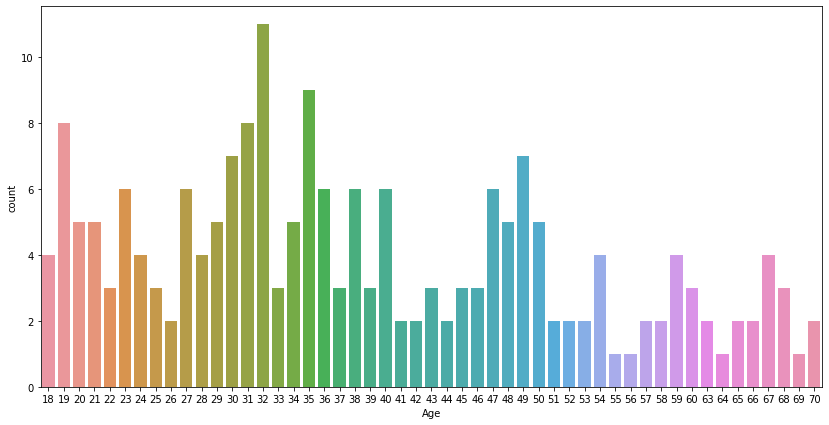

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(1, figsize=(14,7))
sns.countplot(x='Age', data=df.toPandas())
plt.show()